In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"samiehbaniasadi","key":"0903c6717f669a90b6e9bc275f9b1ffa"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 34.8MB/s]


In [6]:
!ls

kaggle.json  mobile-price-classification.zip  sample_data


In [7]:
import zipfile
zip_ref = zipfile.ZipFile("mobile-price-classification.zip", "r")
zip_ref.extractall("files")
zip_ref.close()

In [8]:
!ls files

test.csv  train.csv


In [9]:
# read train data
train = pd.read_csv("files/train.csv")
display(train)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [10]:
# read test data
test = pd.read_csv("files/test.csv")
display(test)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [11]:
# find lower bound and upper of price_range
print('min: {}'.format(train.price_range.min()))
print('max: {}'.format(train.price_range.max()))

min: 0
max: 3


In [12]:
# normalize price range to expensive and cheap
train.price_range = train.price_range.apply(lambda x: x > 1 and 1 or 0)

In [13]:
display(train)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,1
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [15]:
# Split Data
xtrain, xtest, ytrain, ytest = train_test_split(train.drop(columns=['price_range']), train.price_range, test_size=0.2, random_state=0)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1600, 20)
(400, 20)
(1600,)
(400,)


In [16]:
standard_scaler = StandardScaler()
xtrain[xtrain.columns] = standard_scaler.fit_transform(xtrain[xtrain.columns])
xtest[xtest.columns] = standard_scaler.transform(xtest[xtest.columns])

In [17]:
# Forward Selection
def forward_selection(xtrain, ytrain, xtest, ytest):
    acc = 0
    selected_features = []
    for col in xtrain.columns:
        xtrain_r = xtrain[selected_features + [col]]
        xtest_r = xtest[selected_features + [col]]
        lr = LogisticRegression()
        lr.fit(xtrain_r, ytrain)
        score = lr.score(xtest_r, ytest)
        if score > acc:
            acc = score
            selected_features.append(col)
    return(selected_features, acc)

In [18]:
forward_selected_features, forward_selected_score = forward_selection(xtrain, ytrain, xtest, ytest)

print('Forward selection: features: {} \n with acc: {}'.format(forward_selected_features, forward_selected_score))

Forward selection: features: ['battery_power', 'blue', 'clock_speed', 'n_cores', 'px_width', 'ram'] 
 with acc: 0.9725


In [19]:
# Logistic regression with forward selection
lr = LogisticRegression()
lr.fit(xtrain[forward_selected_features], ytrain)
ypredict = lr.predict(xtest[forward_selected_features])
print(classification_report(ytest, ypredict))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       187
           1       0.98      0.97      0.97       213

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [20]:
# Logistic regression with PCA decomposition
pca = PCA(n_components = len(forward_selected_features))
pca.fit(xtrain)

pcatrain = pca.transform(xtrain)
pcatest = pca.transform(xtest)

pcam = LogisticRegression().fit(pcatrain, ytrain)
print(classification_report(ytest, pcam.predict(pcatest)))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69       187
           1       0.73      0.69      0.71       213

    accuracy                           0.70       400
   macro avg       0.70      0.70      0.70       400
weighted avg       0.70      0.70      0.70       400



Feature engineering

In [21]:
# binding
train_binding = train.copy()

train_binding['battery_bin'] = pd.cut(train.battery_power, bins = [0, 900, 1500, 4000], labels = [1, 2, 3])
train_binding.battery_bin.describe()


count     2000
unique       3
top          2
freq       773
Name: battery_bin, dtype: int64

In [22]:
display(train_binding)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,battery_bin
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,1,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,1,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,1,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0,1
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,1,3
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,1,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0,3


In [23]:
train_binding.battery_bin.value_counts()

2    773
3    662
1    565
Name: battery_bin, dtype: int64

In [24]:
# one hot encoding
print(train.blue.value_counts())
print(train.wifi.value_counts())
print(train.dual_sim.value_counts())

def one_hot_encoding(record):
  record['no_blue'] = int(record['blue']) == 0 and 1 or 0
  record['no_wifi'] = record['wifi'] == 0 and 1 or 0
  record['no_dual_sim'] = record['dual_sim'] == 0 and 1 or 0
  return record

oh_train = train.apply(one_hot_encoding, axis=1)
display(oh_train)

0    1010
1     990
Name: blue, dtype: int64
1    1014
0     986
Name: wifi, dtype: int64
1    1019
0     981
Name: dual_sim, dtype: int64


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,no_blue,no_wifi,no_dual_sim
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,...,9.0,7.0,19.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,...,17.0,3.0,7.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,...,11.0,2.0,9.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,...,16.0,8.0,11.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,...,8.0,2.0,15.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794.0,1.0,0.5,1.0,0.0,1.0,2.0,0.8,106.0,6.0,...,13.0,4.0,19.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1996,1965.0,1.0,2.6,1.0,0.0,0.0,39.0,0.2,187.0,4.0,...,11.0,10.0,16.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1997,1911.0,0.0,0.9,1.0,1.0,1.0,36.0,0.7,108.0,8.0,...,9.0,1.0,5.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
1998,1512.0,0.0,0.9,0.0,4.0,1.0,46.0,0.1,145.0,5.0,...,18.0,10.0,19.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0


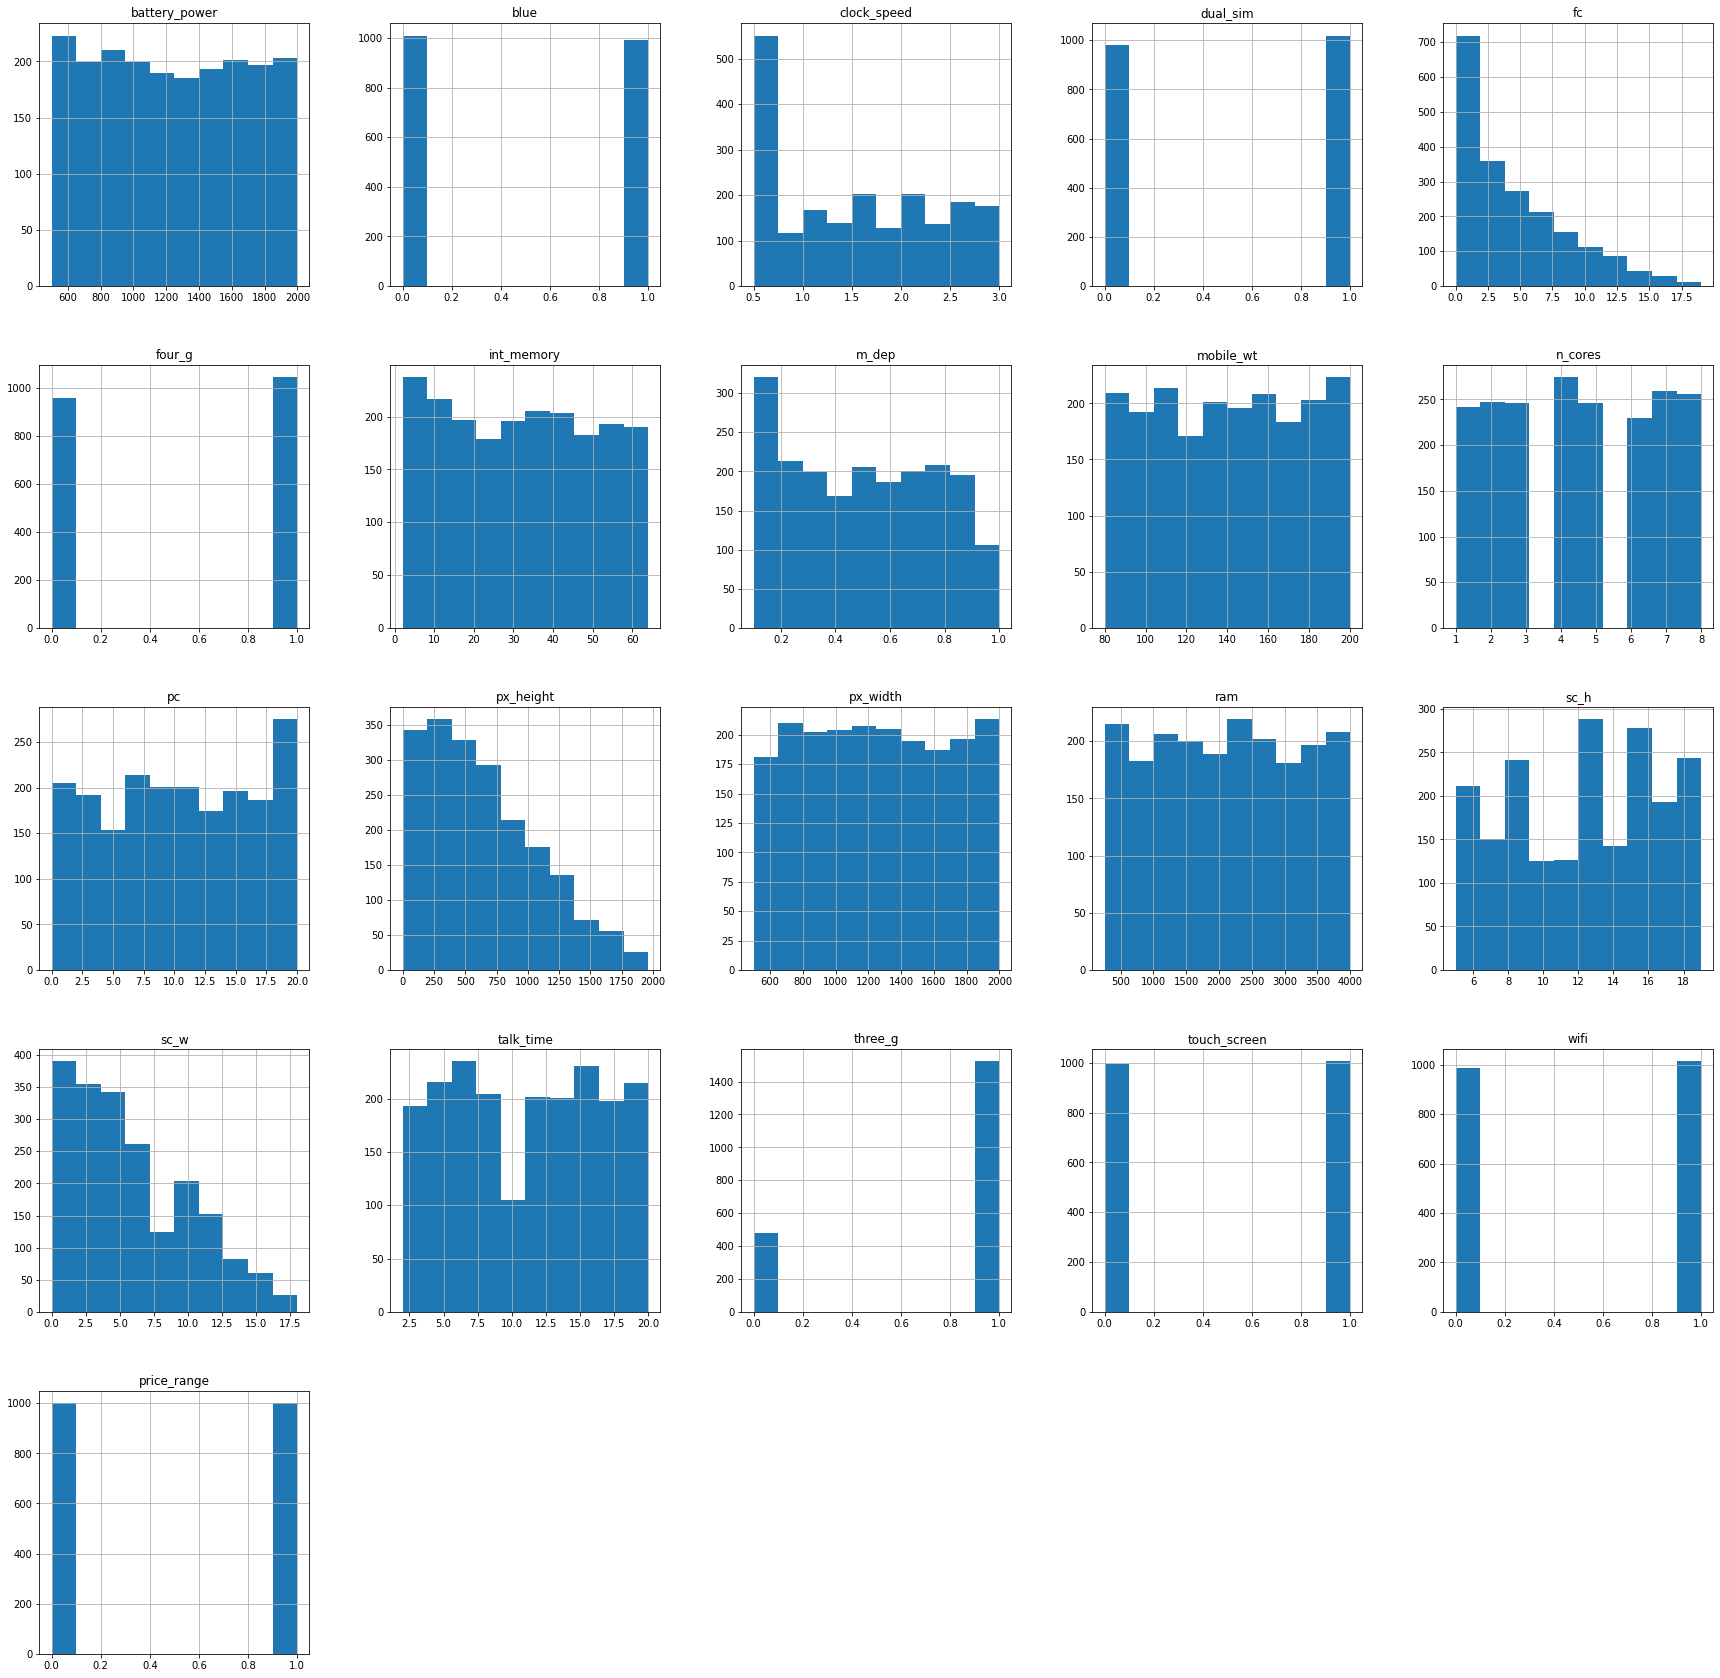

In [25]:
train.hist(figsize=(30,30))
plt.show()

In [26]:
def log_transform(item):
  return item > 0 and np.log(item) or item
  

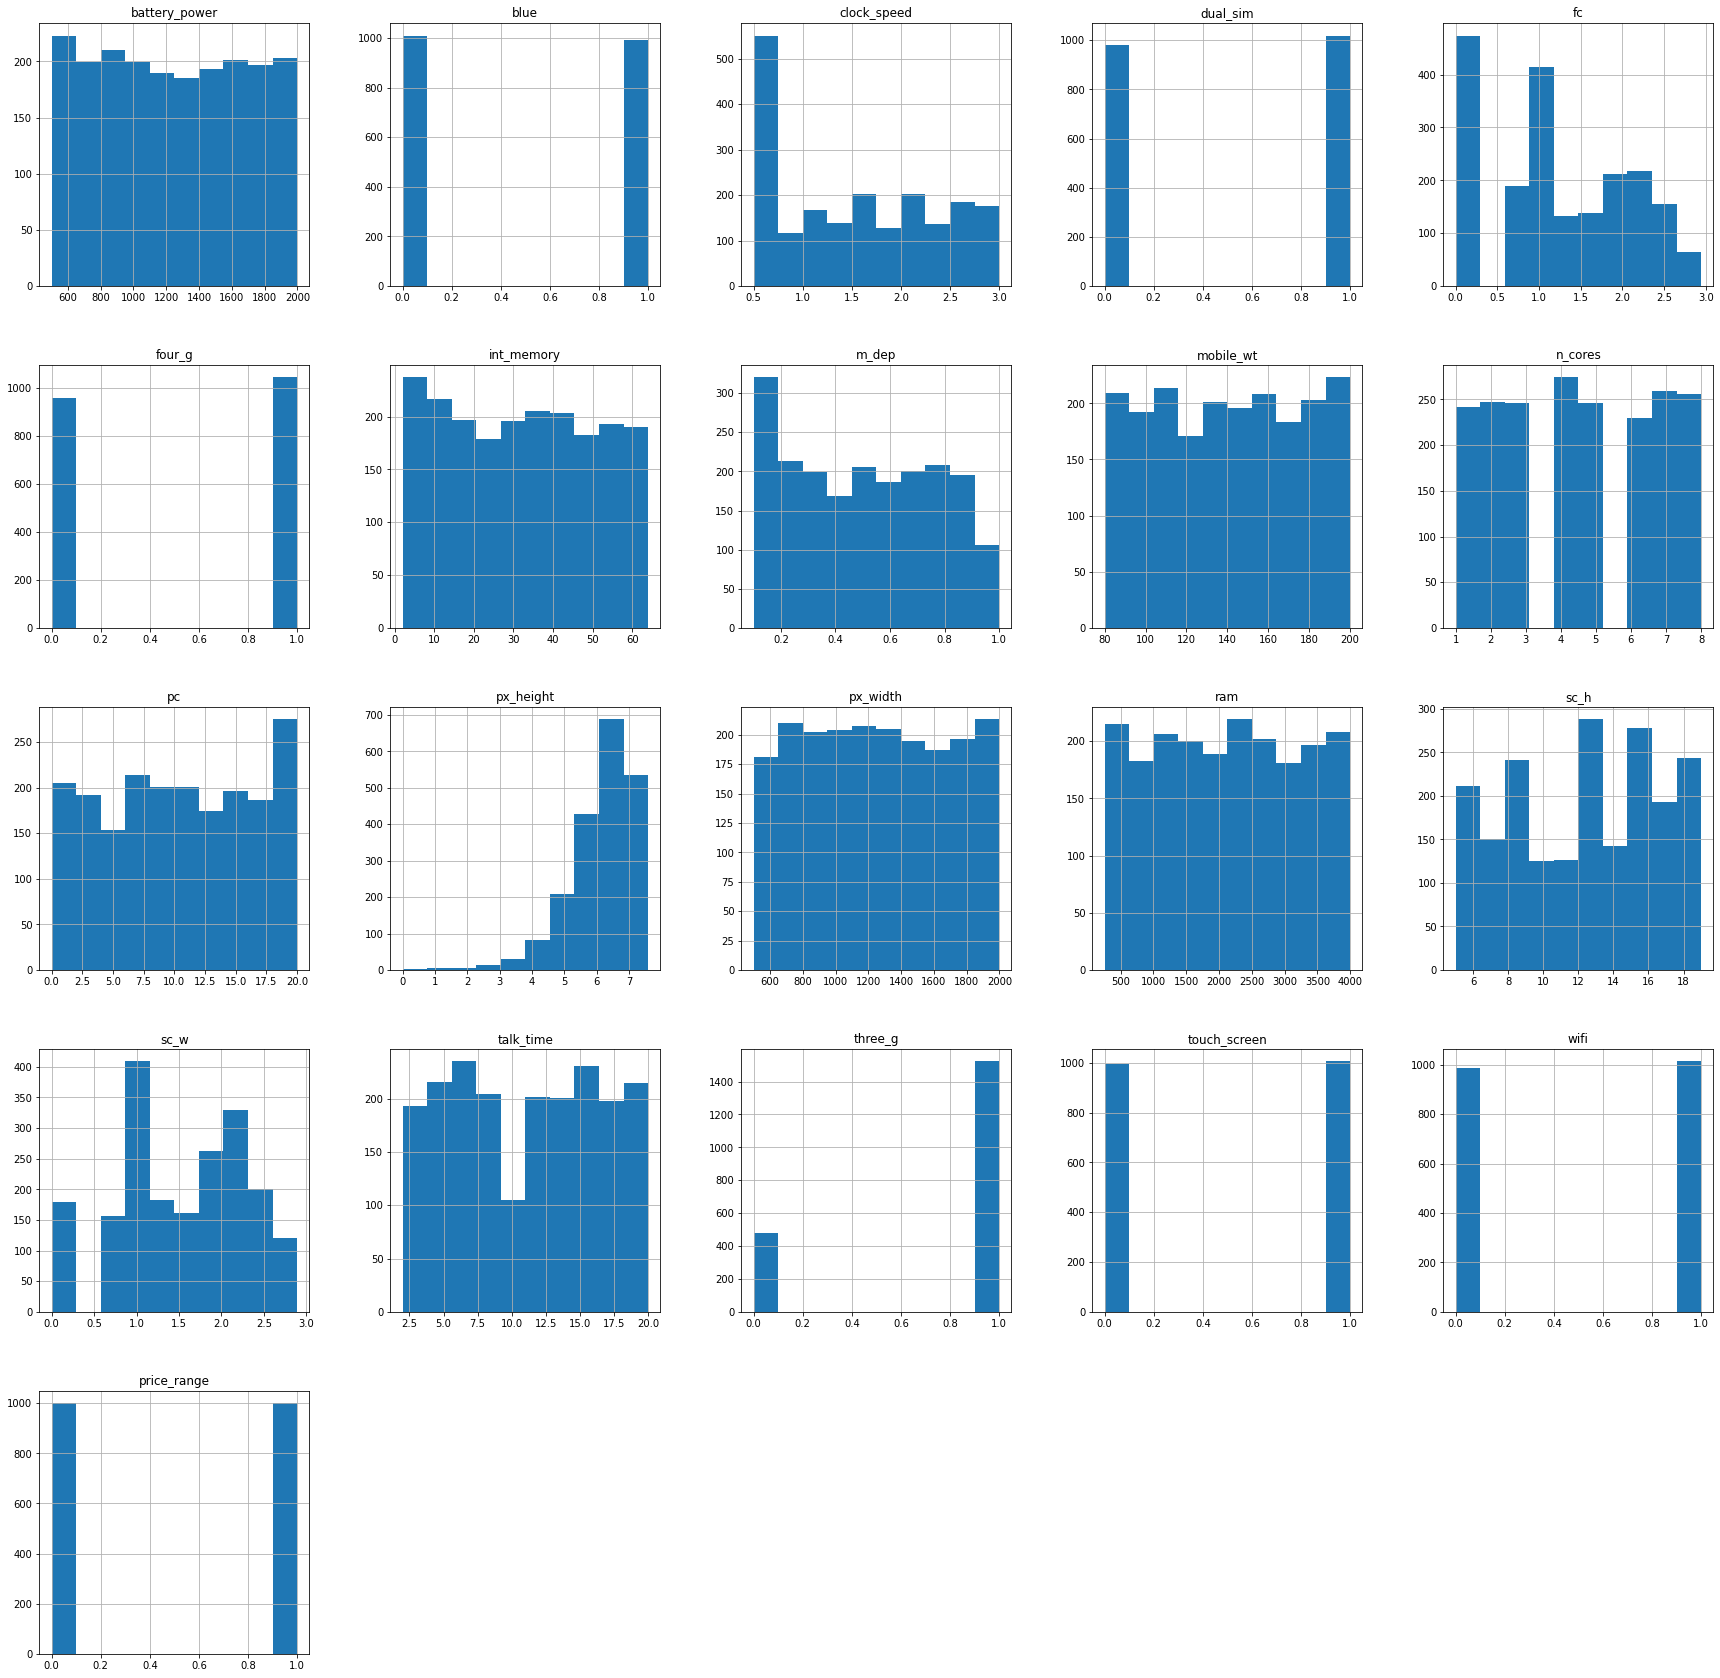

In [27]:
# As shown in the hist diagram fc, px_height and sc_w are candid for log transform
train_log = train.copy()
train_log.fc = train_log.fc.apply(log_transform)
train_log.px_height = train_log.px_height.apply(log_transform)
train_log.sc_w = train_log.sc_w.apply(log_transform)

train_log.hist(figsize=(30,30))
plt.show()

It seems log transform was suitable for sc_w and fc but not for px_height.

In [28]:
# Create New Feature
train_area = train.copy()
train_area['sc_area'] = train.sc_w * train.sc_h


In [29]:
display(train)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,1
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [30]:
# Logistic Regression

def full_lrc(train_data):
  xtrain_data, xtest_data, ytrain_data, ytest_data = train_test_split(train_data.drop(columns=['price_range']), train_data.price_range, test_size=0.2, random_state=0)
  standard_scaler = StandardScaler()
  xtrain_data[xtrain_data.columns] = standard_scaler.fit_transform(xtrain_data[xtrain_data.columns])
  xtest_data[xtest_data.columns] = standard_scaler.transform(xtest_data[xtest_data.columns])  
  lr = LogisticRegression()
  lr.fit(xtrain_data, ytrain_data)
  score = lr.score(xtest_data, ytest_data)
  return score

output_lrc_string = 'Accuracy of LRC with {} is {}'

In [31]:
# Binding

print(output_lrc_string.format('binding', full_lrc(train_binding)))

Accuracy of LRC with binding is 0.985


In [32]:
# One Hot Ecncoding
print(output_lrc_string.format('one hot encoding', full_lrc(oh_train)))

Accuracy of LRC with one hot encoding is 0.985


In [33]:
# Log Transform
print(output_lrc_string.format('Log Transform with px_height', full_lrc(train_log)))

# revert back px_height to original
train_log.px_height = train.px_height
print(output_lrc_string.format('Log Transform without px_height', full_lrc(train_log)))


Accuracy of LRC with Log Transform with px_height is 0.9675
Accuracy of LRC with Log Transform without px_height is 0.9825


In [34]:
# Area
print(output_lrc_string.format('Area', full_lrc(train_area)))


Accuracy of LRC with Area is 0.985


In [35]:
# Merge All Data
train_all = train.copy()
train_all['battery_bin'] = train_binding.battery_bin
train_all['area'] = train_area.sc_area
train_all.fc = train_log.fc
train_all.sc_w = train_log.sc_w
train_all['no_wifi'] = oh_train.no_wifi
train_all['no_blue'] = oh_train.no_blue
train_all['no_dual_sim'] = oh_train.no_dual_sim

print(output_lrc_string.format('ALL', full_lrc(train_all)))


Accuracy of LRC with ALL is 0.9825


In [36]:
def backward_selection(train):
  selected_features = train.columns.to_list()
  acc = full_lrc(train)
  for i in range(len(selected_features)):
      col = selected_features.pop(0)
      score = full_lrc(train)
      if score > acc:
          acc = score
      else:
          selected_features.append(col)
  return(selected_features, acc)


In [37]:
bs_train = train.copy()
backward_selected_features, backward_selected_score = backward_selection(bs_train)

print('Forward selection: features: {} \n with acc: {}'.format(backward_selected_features, backward_selected_score))

Forward selection: features: ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range'] 
 with acc: 0.985


In [38]:
# Logistic regression with backward selection
xtrain, xtest, ytrain, ytest = train_test_split(train.drop(columns=['price_range']), train.price_range, test_size=0.2, random_state=0)
standard_scaler = StandardScaler()
xtrain[xtrain.columns] = standard_scaler.fit_transform(xtrain[xtrain.columns])
xtest[xtest.columns] = standard_scaler.transform(xtest[xtest.columns])
lr = LogisticRegression()
lr.fit(xtrain[forward_selected_features], ytrain)
ypredict = lr.predict(xtest[forward_selected_features])
print(classification_report(ytest, ypredict))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       187
           1       0.98      0.97      0.97       213

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

